# Simple RAG

**Tech Stack** 
1. vectordatabase - ChramaDB
2. sentence embedding - all-MiniLM-L6-v2
3. llm - llama3-8b


## Document Loaders

#### 1) using pypdf 

In [1]:
import streamlit as st
from langchain_community.document_loaders import PyPDFLoader
import os

loader = PyPDFLoader("C:/Users/mayur/Desktop/FRACSNET/assets/demo.pdf")
pages = loader.load()

ans = pages[0].page_content
print(ans)


Patient Name: Date: 
Understanding Insulin Resistance
Insulin is made by the pancreas and is critical to maintaining healthy blood sugar levels. Insulin resistance is a 
condition where cells become dysfunctional and unable to respond properly to insulin signals. This makes it 
difficult for glucose to enter the cells and be used as fuel by key tissues, such as the muscles, liver and brain.
Insulin resistance further contributes to inflammation, high blood pressure, high cholesterol, fatty liver and 
type 2 diabetes. 
Sugar Cravings
Fatigue
Elevated Triglycerides
Abdominal Weight Gain
Continuous Hunger
Diﬃculty Losing Weight
Sugar/High Processed Food Intake
Inactivity
Dietary De/f_iciences
Elevated Uric Acid
Chronic Stress
Obesity
Environmental Factors
Cardiovascular Disease
Type 2 Diabetes
Blood Pressure Imbalances
Stroke
Fatty Liver Disease (NAFLD)
Cognitive Decline/Alzheimer's
PCOS/Hormone Imbalances
SYMPTOMS OF 
INSULIN RESISTANCE
CONSEQUENCES  OF 
INSULIN RESISTANCE
CAUSES OF 
INS

### 3) Using pymupdf

In [11]:
import fitz  # PyMuPDF

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text() + "\n\n"
    doc.close()
    return text

# Path to uploaded PDF
pdf_path = "C:/Users/mayur/Desktop/FRACSNET/assets/demo.pdf"

# Extract text
extracted_text = extract_text_from_pdf(pdf_path)
print(extracted_text)

Patient Name: 
Date: 
Understanding Insulin Resistance
Insulin is made by the pancreas and is critical to maintaining healthy blood sugar levels. Insulin resistance is a 
condition where cells become dysfunctional and unable to respond properly to insulin signals. This makes it 
difficult for glucose to enter the cells and be used as fuel by key tissues, such as the muscles, liver and brain.
Insulin resistance further contributes to inflammation, high blood pressure, high cholesterol, fatty liver and 
type 2 diabetes. 
Sugar Cravings
Fatigue
Elevated Triglycerides
Abdominal Weight Gain
Continuous Hunger
Diﬃculty Losing Weight
Sugar/High Processed Food Intake
Inactivity
Dietary Deﬁciences
Elevated Uric Acid
Chronic Stress
Obesity
Environmental Factors
Cardiovascular Disease
Type 2 Diabetes
Blood Pressure Imbalances
Stroke
Fatty Liver Disease (NAFLD)
Cognitive Decline/Alzheimer's
PCOS/Hormone Imbalances
SYMPTOMS OF 
INSULIN RESISTANCE
CONSEQUENCES  OF 
INSULIN RESISTANCE
CAUSES OF 
INSUL

### 3) Using gemini-1.5-flash (vision model)

In [27]:
import google.generativeai as genai
from PIL import Image
image = Image.open("C:/Users/mayur/Desktop/FRACSNET/assets/demo2.png")
# C:\Users\mayur\Desktop\FRACSNET\assets\image.png
# Generate a prompt for the generative model
# prompt = "Extract all the information from the image below and provide a detailed description. Include only the factual content of the image without adding any introductory phrases, interpretations, or additional commentary like 'your image describes' or 'your image contains.' If the image contains tables, describe the content of the tables in clear, descriptive sentences. Do not present the table data in rows and columns or any structured format. Instead, convert all tabular data into paragraph form. The output should strictly consist of the description of the image and any tabular data, without any extra text. "
prompt ="Extract all the information from the image below and provide a detailed description in markdown format. Include only the factual content of the image without adding any introductory phrases, interpretations, or additional commentary like 'your image describes' or 'your image contains.' If the image contains tables, describe the content of the tables in clear, descriptive sentences. Do not present the table data in rows and columns or any structured format. Instead, convert all tabular data into paragraph form. The output should strictly consist of the description of the image and any tabular data, without any extra text."

# Initialize and use the generative model for the image
model = genai.GenerativeModel(model_name="gemini-1.5-flash")
response = model.generate_content([prompt, image])

ans = response.text

print(ans)


High blood pressure, also known as hypertension, is a leading risk factor for serious cardiac conditions such as stroke, heart attack and premature death.  High blood pressure may show no symptoms yet puts you at increased risk for potentially catastrophic health events. One important step in controlling high blood pressure is to optimize nitric oxide (NO) production through lifestyle changes. NO diffuses into the smooth muscle cells that line arteries and promotes proper vessel relaxation (vasodilation), improves blood flow and blood pressure balance. Lifestyle factors focused on reducing inflammation and managing stress also help to lower elevated blood pressure. Eighty percent of nitric oxide dietary intake comes from vegetables and water. Nitric oxide production begins in the mouth.  Hypertension risk factors include obesity, poor diet (high sodium and saturated fat), drinking too much alcohol, smoking, chronic stress, chronic kidney dysfunction, hormone imbalances, race (high bloo

# Data Extraction

#### Data Extraction Using gemini-1.5-flash ( pdf pages -> images -> markdown format)

In [ ]:
import google.generativeai as genai
from pdf2image import convert_from_path
import os
from PIL import Image
import tempfile

def analyze_pdf(pdf_path, output_dir=None):

    # Create output directory if it doesn't exist
    if output_dir is None:
        output_dir = os.path.dirname(pdf_path)
    os.makedirs(output_dir, exist_ok=True)
    
    # Convert PDF to images
    print("Converting PDF to images...")
    with tempfile.TemporaryDirectory() as temp_dir:
        images = convert_from_path(pdf_path)
        
        # Initialize Gemini model
        model = genai.GenerativeModel(model_name="gemini-1.5-flash")
        
        # Create a single markdown file for all descriptions
        output_file = os.path.join(output_dir, "full_description10.md")
        with open(output_file, 'w', encoding='utf-8') as md_file:
            # Process each page
            for i, image in enumerate(images, 1):
                print(f"Processing page {i} of {len(images)}...")
                
                # Save temporary image
                temp_image_path = os.path.join(temp_dir, f'page_{i}.png')
                image.save(temp_image_path)
                
                # Generate prompt and analyze with Gemini
                prompt = "Extract all the information from the image below and provide a detailed description. Include only the factual content of the image without adding any introductory phrases, interpretations, or additional commentary like 'your image describes' or 'your image contains.' The output should strictly consist of the description of the image. There should be semantic description"
                
                # Load image for Gemini
                with Image.open(temp_image_path) as img:
                    response = model.generate_content([prompt, img])
                
                # Write the result to the markdown file
                md_file.write(f"## Page {i}\n\n")  # Add a header for the page
                md_file.write(response.text + "\n\n")  # Add the description
                
                print(f"Completed analysis of page {i}")
    
    print(f"All descriptions have been saved to: {output_file}")
    return output_file

# Example usage
if __name__ == "__main__":
    # Replace with your PDF path
    pdf_path = "C:/Users/mayur/Desktop/FRACSNET/knowledge/splitted_data/merged chunks/LT-CTLG-001 vI-10.pdf"
    
    # Optional: specify output directory
    output_dir = "C:/Users/mayur/Desktop/FRACSNET/knowledge/extracted_md_data"
    
    try:
        result_file = analyze_pdf(pdf_path, output_dir)
        print("\nAnalysis complete!")
        print(f"Results have been saved to: {result_file}")
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

Converting PDF to images...
Processing page 1 of 13...
Completed analysis of page 1
Processing page 2 of 13...
Completed analysis of page 2
Processing page 3 of 13...
Completed analysis of page 3
Processing page 4 of 13...
Completed analysis of page 4
Processing page 5 of 13...
Completed analysis of page 5
Processing page 6 of 13...
Completed analysis of page 6
Processing page 7 of 13...
Completed analysis of page 7
Processing page 8 of 13...
Completed analysis of page 8
Processing page 9 of 13...
Completed analysis of page 9
Processing page 10 of 13...
Completed analysis of page 10
Processing page 11 of 13...
Completed analysis of page 11
Processing page 12 of 13...
Completed analysis of page 12
Processing page 13 of 13...
Completed analysis of page 13
All descriptions have been saved to: C:/Users/mayur/Desktop/FRACSNET/knowledge/text\full_description10.md

Analysis complete!
Results have been saved to: C:/Users/mayur/Desktop/FRACSNET/knowledge/text\full_description10.md


## Pdf pages to image conversion

In [ ]:
from pdf2image import convert_from_path
import os

def pdf_to_images(pdf_path, output_folder, dpi=300):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Create output directory if not exists

    images = convert_from_path(pdf_path, dpi=dpi)  # Convert PDF to images
    for i, image in enumerate(images):
        image_path = os.path.join(output_folder, f"page_{i+1}.png")
        image.save(image_path, "PNG")  # Save each page as an image
        print(f"Saved: {image_path}")

# Path to PDF
pdf_path = r"C:\Users\mayur\Desktop\FRACSNET\knowledge\ML.pdf"

# Output directory
output_dir = r"C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images"

# Convert PDF to images
pdf_to_images(pdf_path, output_dir)                                                                                                                                                                                                                                           

Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_1.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_2.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_3.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_4.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_5.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_6.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_7.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_8.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_9.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_10.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_11.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_12.png
Saved: C:\Users\mayur\Desktop\FRACSNET\knowledge\output_images\page_13.png
Saved: C:\Users\mayur\Desktop\FRAC

### Cobine multiple markdown files to one

In [1]:
import os
import glob

def combine_markdown_files(input_dir, output_file):
    # Get list of all markdown files in the folder
    markdown_files = glob.glob(os.path.join(input_dir, "*.md"))

    # Sort files by name (optional)
    markdown_files.sort()

    with open(output_file, 'w', encoding='utf-8') as outfile:
        for file in markdown_files:
            with open(file, 'r', encoding='utf-8') as infile:
                outfile.write(f"# {os.path.basename(file)}\n\n")  # Add filename as header
                outfile.write(infile.read() + '\n\n')  # Add content with spacing

    print(f"Combined {len(markdown_files)} Markdown files into {output_file}")


# Folder containing Markdown files
input_dir = "C:/Users/mayur/Desktop/FRACSNET/knowledge/extracted_md_data"

# Output combined Markdown file
output_file = "C:/Users/mayur/Desktop/FRACSNET/knowledge/combined.md"

# Run function
combine_markdown_files(input_dir, output_file)


Combined 11 Markdown files into C:/Users/mayur/Desktop/FRACSNET/knowledge/combined.md


## Enhancing text splitters

In [18]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader
from langchain_core.documents import Document

markdown_path = "C:/Users/mayur/Desktop/FRACSNET/knowledge/combined.md"
loader = UnstructuredMarkdownLoader(markdown_path)

markdown_document = loader.load()
# markdown_document[0].page_content

In [32]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

markdown_path = "C:/Users/mayur/Desktop/FRACSNET/knowledge/combined.md"
with open(markdown_path, "r", encoding="utf-8") as file:
    markdown_document = file.read()


headers_to_split_on = [
    ("##", "page no"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits[161]

Document(metadata={'page no': 'Page 15'}, page_content='Product Comparisons Stress Resiliency Products  \nProductPatient ProfileBacopaHoly BasilAshwagandha Root ExtractRhodiolaEleutheroPhosphatidyl-serineLicorice Root ExtractL-TheanineAdrenal Concentrate (Bovine)\nNuAdaptⓇ Stress Reduction Formula page 76Patients who are stressed and wired with decreased focus/attention✔✔✔✔✔\nTruAdaptⓇ Stress Recovery Formula page 114Patients who are stressed and tired with decreased memory/immune challenges✔✔✔✔✔\nTruAdaptⓇ Plus Stress Recovery Formula page 115Patients who are stressed and tired with decreased memory/immune/ adrenal stress system challenges✔✔✔✔\nAdapten-All® page 15Patients who are stressed and tired✔✔✔✔\nAdren-All® page 16Patients who are stressed and tired✔✔✔\nAdreneVive® page 16Patients who are stressed and wired✔✔✔  \nThese statements have not been evaluated by the Food and Drug Administration.  These products are not intended to diagnose, treat, cure, or prevent any disease.  ORDE

In [50]:
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_chroma import Chroma

def embd_load_vectordb(filepath):

    # Load and split the PDF document
    with open(filepath, "r", encoding="utf-8") as file:
        markdown_document = file.read()

    headers_to_split_on = [
        ("##", "page no"),
    ]

    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
    md_header_splits = markdown_splitter.split_text(markdown_document)

    # Initialize the embedding model
    embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

    # Create a Chroma vector store with a specified directory for persistence
    vectordb = Chroma.from_documents(md_header_splits, embedding, persist_directory="./test_db")
    print("Vector database created and persisted.")
    return vectordb


markdown_path = "C:/Users/mayur/Desktop/FRACSNET/knowledge/combined.md"
embd_load_vectordb(markdown_path)

Vector database created and persisted.


In [51]:

from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_ollama import ChatOllama
load_dotenv()


llm = ChatGroq(model_name="Llama3-8b-8192")

# llm = ChatOllama(
#     model = "deepseek-r1:1.5b",
#     temperature = 0,
#     num_predict = 256,
#     # other params ...
# )


markdown_path = "C:/Users/mayur/Desktop/FRACSNET/knowledge/combined.md"

def embd_load_vectordb(filepath):

    # Load and split the PDF document
    with open(filepath, "r", encoding="utf-8") as file:
        markdown_document = file.read()

    headers_to_split_on = [
        ("##", "page no"),
    ]

    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
    md_header_splits = markdown_splitter.split_text(markdown_document)

    # Initialize the embedding model
    embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

    # Create a Chroma vector store with a specified directory for persistence
    vectordb = Chroma.from_documents(md_header_splits, embedding, persist_directory="./test_db")
    print("Vector database created and persisted.")
    return vectordb


def load_vectordb():
    embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

    loaded_db = Chroma(persist_directory="./test_db", embedding_function=embedding)
    return loaded_db
    
vectordb = load_vectordb()



def response_generator(vectordb, query, llm):
    template = """Use the following pieces of context to answer the question at the end. 
    If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. {context} Question: {question} Helpful Answer:"""


    QA_CHAIN_PROMPT = PromptTemplate(input_variables=["context", "question"], template=template)

    qa_chain = RetrievalQA.from_chain_type(llm, 
                                           retriever=vectordb.as_retriever(), 
                                           return_source_documents=True, 
                                           chain_type_kwargs={"prompt":QA_CHAIN_PROMPT})

    ans = qa_chain.invoke(query)
    return ans["result"]

   
query = "what are the side effects of Ondansetron"
ans = response_generator(vectordb, query, llm)
print(ans)

I don't know. The provided text does not mention Ondansetron or its potential side effects. It appears to be a collection of information about different supplements, including TruAdapt Plus, Turiva, Rhubestryn, and Saccharomyces boulardii. If you are looking for information on the side effects of Ondansetron, I suggest searching for reputable sources such as the FDA, WebMD, or the manufacturer's website.


In [52]:
query = "what are  Nutrient Recommendations for NAFLD"
ans = response_generator(vectordb, query, llm)
print(ans)

The Nutrient Recommendations for NAFLD listed are:

* Berberine: Reduces blood sugar levels and fat storage while increasing insulin sensitivity. 1 g/day.
* Bergamot & Artichoke: Reduces liver fat deposition and prevents NAFLD progression. 600 mg/day.
* Aged Black Garlic: Improves liver function, reduces cholesterol, and protects blood vessels from inflammation. 250 mg/day.
* Alpha Lipoic Acid: A potent metabolic activator that increases fat and sugar metabolism; it is also a highly-protective antioxidant that defends blood vessels from high blood sugar, high cholesterol, and chronic inflammation. 300-600 mg/day.


In [ ]:

from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_ollama import ChatOllama
load_dotenv()

llm = ChatGroq(model_name="Llama3-8b-8192")

# llm = ChatOllama(
#     model = "deepseek-r1:1.5b",
#     temperature = 0,
#     num_predict = 256,
#     # other params ...
# )



def embd_load_vectordb(filepath):
    # Initialize the embedding model
    embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
        # Load and split the PDF document
    docs = PyPDFLoader(filepath).load_and_split()
    # Create a Chroma vector store with a specified directory for persistence
    vectordb = Chroma.from_documents(docs, embedding, persist_directory="./test_db")
    print("Vector database created and persisted.")
    return vectordb


def load_vectordb():
    embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

    loaded_db = Chroma(persist_directory="./test_db", embedding_function=embedding)
    return loaded_db
    
vectordb = load_vectordb()



def response_generator(vectordb, query, llm):
    template = """Use the following pieces of context to answer the question at the end. 
    If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. {context} Question: {question} Helpful Answer:"""


    QA_CHAIN_PROMPT = PromptTemplate(input_variables=["context", "question"], template=template)

    qa_chain = RetrievalQA.from_chain_type(llm, 
                                           retriever=vectordb.as_retriever(), 
                                           return_source_documents=True, 
                                           chain_type_kwargs={"prompt":QA_CHAIN_PROMPT})

    ans = qa_chain.invoke(query)
    return ans["result"]

   
query = "what are the side effects of Ondansetron"
ans = response_generator(vectordb, query, llm)
print(ans)


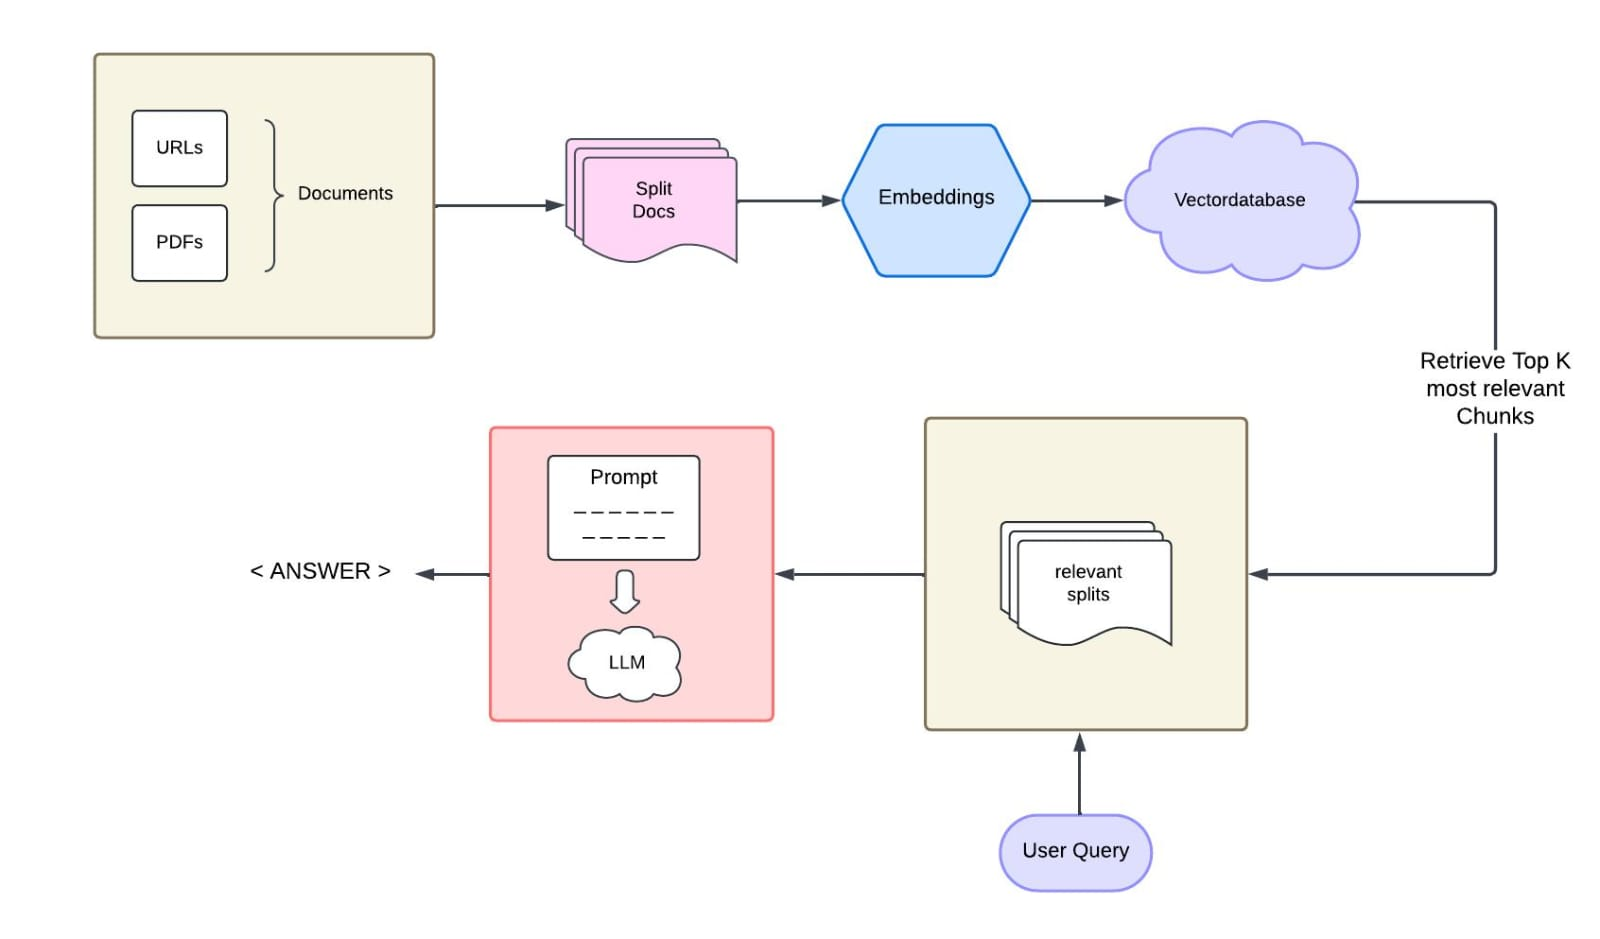

In [12]:
from IPython.display import HTML
import base64

# Convert image to Base64
image_path = "C:/Users/mayur/Desktop/FRACSNET/assets/simple_rag.jpeg"
with open(image_path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Display the image with custom size
HTML(f'<img src="data:image/jpeg;base64,{encoded_string}" width="800" height="550">')

In [2]:
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_ollama import ChatOllama
load_dotenv()

True

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
result = llm.invoke("Write a ballad about LangChain")
print(result.content)

The coder toiled, in digital night,
With data vast, a daunting sight.
To weave it all, a tangled thread,
A knowledge base, within his head.

He'd built some bots, but they were weak,
Their answers short, their knowledge bleak.
They lacked the flow, the human touch,
And failed to grasp, oh so much.

Then whispers came, on winds of code,
Of LangChain's power, widely showed.
A framework bold, a shining star,
To bridge the gap, near and far.

With LLM's might, it took its stand,
Connecting chains, across the land.
Of prompts and thoughts, a flowing stream,
A tapestry, a waking dream.

The coder learned, with eager eyes,
Of chains of thought, and clever lies,
Of agents acting, bold and bright,
To solve complex problems, day and night.

He built a bot, with newfound skill,
That answered questions, with a will.
It searched and reasoned, understood,
And brought forth knowledge, pure and good.

From simple tasks, to complex quests,
LangChain's power, put to the tests.
A memory store, a watchful

In [2]:
llm = ChatGroq(model_name="Llama3-8b-8192")

# llm = ChatOllama(
#     model = "deepseek-r1:1.5b",
#     temperature = 0,
#     num_predict = 256,
#     # other params ...
# )


In [3]:
def embd_load_vectordb(filepath, vectordb_path):
    # Initialize the embedding model
    embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
        # Load and split the PDF document
    docs = PyPDFLoader(filepath).load_and_split()
    # Create a Chroma vector store with a specified directory for persistence
    vectordb = Chroma.from_documents(docs, embedding, persist_directory=vectordb_path)
    print("Vector database created and persisted.")
    return vectordb


In [4]:
def load_vectordb(vectordb_path):
    embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

    loaded_db = Chroma(persist_directory=vectordb_path, embedding_function=embedding)
    return loaded_db

In [5]:
def response_generator(vectordb, query, llm):

    template = """
    You are an intelligent assistant designed to provide accurate and concise answers based on the context provided. 
    Follow these rules strictly:
    1. Use ONLY the information provided in the context to answer the question.
    2. If the context does not contain enough information to answer the question, say "I don't know."
    3. Do not make up or assume any information outside of the context.
    4. Keep your answer concise and to the point (maximum 3 sentences).

    Context:
    {context}

    Question:
    {question}

    Helpful Answer:
    """


    QA_CHAIN_PROMPT = PromptTemplate(input_variables=["context", "question"], template=template)

    qa_chain = RetrievalQA.from_chain_type(llm, 
                                           retriever=vectordb.as_retriever(search_kwargs={"k": 3}), 
                                           return_source_documents=True, 
                                           chain_type_kwargs={"prompt":QA_CHAIN_PROMPT})

    ans = qa_chain.invoke(query)
    return ans["result"]


#####################################################################3

In [6]:
# Load the persisted vector store
embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
retriever = Chroma(persist_directory="C:/Users/mayur/Desktop/FRACSNET/RAG_tech_comparisons/test_db", embedding_function=embedding).as_retriever()

# Example query
query = "suggest signs and symptoms Dysautonomia"
retrieved_docs = retriever.get_relevant_documents(query)

# Print retrieved documents
for doc in retrieved_docs:
    print(doc.page_content + "\n\n")


C:\Users\mayur\AppData\Local\Temp\ipykernel_23656\3220821817.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\mayur\AppData\Local\Temp\ipykernel_23656\3220821817.py:7: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = retriever.get_relevant_documents(query)


Patient Name: [blank space]  Date: [blank space]  
Dysautonomia: An Imbalance in the Heart-Brain Connection  
Dysautonomia is a broad term used to describe various conditions that cause a malfunction in the autonomic nervous system (ANS). The ANS controls most of the essential functions of the body that we do not consciously think about, such as heart rate, blood pressure, digestion and temperature control. It consists of the parasympathetic nervous system (which allows us to “rest and digest”) and the sympathetic nervous system (which can cause a "fight-or-flight" response).  
When the autonomic nervous system is out of balance, usually with a sympathetic fight-or-flight dominance, the following physiological responses can occur:  
Signs & Symptoms: unstable blood pressure & heart rate, brain fog, dizziness, digestive complaints, poor circulation, headaches, blotchy skin, tingling fingers & toes, fatigue.  
Physiologic Neurocirculatory Paradigm:  1) Brain responds to cardio output; 2)

In [29]:
def embd_load_vectordb(filepath):
    # Initialize the embedding model
    embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
        # Load and split the PDF document
    docs = PyPDFLoader(filepath).load_and_split()
    return docs

a = embd_load_vectordb("C:/Users/mayur/Desktop/FRACSNET/knowledge/ML.pdf")


In [32]:
print(a[9])

page_content='2.5 Random Forests 
• Random Forest is an ensemble learning method (bagging) that combines 
multiple decision trees to improve the performance and robustness of the 
model.  
• It is used for both classification and regression tasks. 
How Random Forest Works?? 
1. Bootstrap Sampling: Randomly select subsets of the training data (with 
replacement) to create multiple decision trees. 
2. Feature Randomness: At each split in the decision tree, only a random subset 
of features is considered for splitting. 
3. Voting/Averaging: For classification, each tree votes for a class, and the 
majority class is chosen. For regression, the average of all trees' predictions is 
taken.' metadata={'source': 'C:/Users/mayur/Desktop/FRACSNET/knowledge/ML.pdf', 'page': 11}


##############################################################################

In [6]:
vectordb_path = "C:/Users/mayur/Desktop/FRACSNET/RAG_tech_comparisons/test_db"

In [7]:
# emed_data = embd_load_vectordb("./knowledge/health_products_data.pdf")
emed_data = embd_load_vectordb("C:/Users/mayur/Desktop/FRACSNET/knowledge/health.pdf",vectordb_path)

vectordb = load_vectordb(vectordb_path)

C:\Users\mayur\AppData\Local\Temp\ipykernel_32476\17053351.py:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Vector database created and persisted.


In [18]:
query = "suggest signs and symptoms Dysautonomia"
answer = response_generator(vectordb, query, llm)
print(answer)

I don't know. The provided context does not contain information about dysautonomia or its signs and symptoms.


In [21]:
import pandas as pd
import time

# List of questions
questions = [
    "Which pain reliever is LEAST suitable for someone with stomach ulcers?",
    "Ibuprofen and Aspirin share what warning?",
    "Name two medications that might interact with Warfarin.",
    "What is the first-line medication for Type 2 Diabetes?",
    "Which medication might treat both insomnia and depression?",
    "Difference between bronchodilator and inhaled corticosteroid?",
    "Long-term side effects of Prednisone?",
    "Contraindications for Clopidogrel vs. Warfarin?",
]

# Initialize an empty list to store results
results = []

# Generate answers and record time
for query in questions:
    start_time = time.time()  # Start time tracking
    answer = response_generator(vectordb, query, llm)  # Generate answer
    end_time = time.time()  # End time tracking
    time_taken = end_time - start_time  # Calculate time taken

    # Append results to the list
    results.append({
        "Question": query,
        "Simple RAG result": answer,
        "Simple RAG time": time_taken
    })

# Convert the list to a pandas DataFrame
dataset = pd.DataFrame(results)
path = "C:/Users/mayur/Desktop/Tech/Project/FracsNet/RAG_tech_comparisons/simple_RAG.csv"
# Save the dataset to a CSV file
dataset.to_csv(path, index=False)


In [22]:
import pandas as pd

# Set the maximum column width to a large value (e.g., 500 characters)
pd.set_option('display.max_colwidth', 1000)  # Or even higher if needed

df = pd.read_csv(path)
df

,Question,Simple RAG result,Simple RAG time
0,Which pain reliever is LEAST suitable for someone with stomach ulcers?,"According to the context, Ibuprofen is a non-steroidal anti-inflammatory drug (NSAID) that is used to reduce pain, fever, and inflammation. It is contraindicated for individuals with a history of stomach ulcers. Therefore, Ibuprofen is the pain reliever that is LEAST suitable for someone with stomach ulcers.",15.308556
1,Ibuprofen and Aspirin share what warning?,"According to the context, Ibuprofen and Aspirin do not share a specific warning mentioned in the provided information. Aspirin is only mentioned as an interaction with Ibuprofen, but there is no shared warning mentioned. Therefore, I don't know the answer to this question.",26.240417
2,Name two medications that might interact with Warfarin.,"Based on the provided context, two medications that might interact with Warfarin are:\n\n1. Aspirin (36): The context states that Aspirin may interact with blood thinners, which includes Warfarin.\n2. Clopidogrel (37): The context states that Clopidogrel may interact with other medications that increase bleeding risk, which includes blood thinners like Warfarin.",25.200060
3,What is the first-line medication for Type 2 Diabetes?,I don't know. The context does not mention a specific medication as the first-line treatment for Type 2 diabetes.,25.048806
4,Which medication might treat both insomnia and depression?,"Based on the provided context, the medications that might treat both insomnia and depression are:\n\n* Zoloft (sertraline) - Common side effects include insomnia and depression.\n* Prozac (fluoxetine) - Common side effects include insomnia and depression.\n* Paxil (paroxetine) - Common side effects include insomnia and depression.\n* Celexa (citalopram) - Common side effects include insomnia and depression.\n\nAll of these medications work by increasing levels of serotonin in the brain, which can help treat depression, and they also have insomnia as a common side effect.",19.087255
5,Difference between bronchodilator and inhaled corticosteroid?,"I don't know. The context only provides information about a specific bronchodilator, Salmeterol, and two other medications, Albuterol and Ipratropium. It does not provide information about inhaled corticosteroids or their differences from bronchodilators.",26.351331
6,Long-term side effects of Prednisone?,"According to the provided context, the long-term side effects of Prednisone are: ""Warnings: Long-term use can have significant side effects.""",26.421096
7,Contraindications for Clopidogrel vs. Warfarin?,"I don't know.\n\nThe provided context only includes information about Clopidogrel (37. Name: Clopidogrel) and does not mention Warfarin. To provide an accurate answer, I would need more information about Warfarin's contraindications.",24.350145


# Advanced RAG (Dense Passage Retrieval (DPR) Technique)

In [24]:
from sentence_transformers import SentenceTransformer
from langchain_community.document_loaders import PyPDFLoader
import faiss
import numpy as np

from langchain_groq import ChatGroq


In [25]:
llm = ChatGroq(model_name="Llama3-8b-8192")

In [26]:
# Load DPR Model
query_encoder = SentenceTransformer('facebook-dpr-question_encoder-single-nq-base')
passage_encoder = SentenceTransformer('facebook-dpr-ctx_encoder-single-nq-base')


In [27]:
data_path = "C:/Users/mayur/Desktop/Tech/Project/FracsNet/knowledge/health_products_data.pdf"
documents = PyPDFLoader(data_path).load_and_split()
passages = [doc.page_content for doc in documents]  # Extract text from Document objects

# Encode Passages into Dense Vectors
passage_embeddings = passage_encoder.encode(passages, convert_to_numpy=True)


In [28]:
# # Create FAISS Index
dimension = passage_embeddings.shape[1]
vectordb = faiss.IndexFlatL2(dimension)
vectordb.add(passage_embeddings)

In [29]:
def response_generator(passages, query, llm):
    query_embedding = query_encoder.encode([query], convert_to_numpy=True)

    # Perform Similarity Search
    k = 3  # Retrieve top-2 passages
    distances, indices = vectordb.search(query_embedding, k)

    # Extract relevant passages
    context = [passages[i] for i in indices[0].tolist()]  # Convert NumPy array to list

    # Construct prompt
    template = f"""
    You are an intelligent assistant designed to provide accurate and concise answers based on the context provided. 
    Follow these rules strictly:
    1. Use ONLY the information provided in the context to answer the question.
    2. If the context does not contain enough information to answer the question, say "I don't know."
    3. Do not make up or assume any information outside of the context.
    4. Keep your answer concise and to the point (maximum 3 sentences).

    Context:
    {context}

    Question:
    {query}

    Helpful Answer:
    """

    # Generate response using LLM
    res = llm.invoke(template)
    return res.content



In [30]:
query = "which medicine is used to treat depression"
ans = response_generator(passages, query, llm)
print(ans)

Wellbutrin (bupropion) is an antidepressant medication used to treat depression, seasonal affective disorder (SAD), and to help people quit smoking.


In [31]:
import pandas as pd
import time

# List of questions
questions = [
    "Which pain reliever is LEAST suitable for someone with stomach ulcers?",
    "Ibuprofen and Aspirin share what warning?",
    "Name two medications that might interact with Warfarin.",
    "What is the first-line medication for Type 2 Diabetes?",
    "Which medication might treat both insomnia and depression?",
    "Difference between bronchodilator and inhaled corticosteroid?",
    "Long-term side effects of Prednisone?",
    "Contraindications for Clopidogrel vs. Warfarin?",
]

# Initialize an empty list to store results
results = []

# Generate answers and record time
for query in questions:
    start_time = time.time()  # Start time tracking
    answer = response_generator(passages, query, llm) # Generate answer
    end_time = time.time()  # End time tracking
    time_taken = end_time - start_time  # Calculate time taken

    # Append results to the list
    results.append({
        "Question": query,
        "DPR RAG result": answer,
        "DPR RAG time": time_taken
    })

# Convert the list to a pandas DataFrame
dataset = pd.DataFrame(results)
path = "C:/Users/mayur/Desktop/Tech/Project/FracsNet/RAG_tech_comparisons/DPR_RAG.csv"
# Save the dataset to a CSV file
dataset.to_csv(path, index=False)


In [32]:
import pandas as pd

# Set the maximum column width to a large value (e.g., 500 characters)
pd.set_option('display.max_colwidth', 1000)  # Or even higher if needed

df = pd.read_csv(path)
df

,Question,DPR RAG result,DPR RAG time
0,Which pain reliever is LEAST suitable for someone with stomach ulcers?,"According to the context, Aspirin is the pain reliever that is LEAST suitable for someone with stomach ulcers.",1.051339
1,Ibuprofen and Aspirin share what warning?,"Ibuprofen and Aspirin share the warning ""Take with food to reduce stomach irritation. Avoid alcohol.""",1.444564
2,Name two medications that might interact with Warfarin.,"According to the provided context, Warfarin may interact with many medications, including:\n\n1. Aspirin\n2. Antibiotics",23.224409
3,What is the first-line medication for Type 2 Diabetes?,I don't know. The provided context does not mention Type 2 Diabetes or any medications for it.,25.280945
4,Which medication might treat both insomnia and depression?,"Based on the context, the medication that might treat both insomnia and depression is Remeron (mirtazapine). It is an antidepressant medication that also helps to improve sleep.",24.341810
5,Difference between bronchodilator and inhaled corticosteroid?,I don't know.,24.342318
6,Long-term side effects of Prednisone?,"I don't know. The provided context does not contain information about Prednisone, its uses, side effects, or long-term effects.",24.479599
7,Contraindications for Clopidogrel vs. Warfarin?,"According to the provided context, the contraindications for Clopidogrel and Warfarin are:\n\n* Clopidogrel: Active bleeding, severe liver disease\n* Warfarin: Active bleeding, severe liver disease, pregnancy\n\nTherefore, the answer is: The contraindications for Clopidogrel and Warfarin are similar, but Warfarin has an additional contraindication of pregnancy.",25.214692


# Comparison dataset of both Techniques

In [33]:
import pandas as pd


path1 = "C:/Users/mayur/Desktop/Tech/Project/FracsNet/RAG_tech_comparisons/simple_RAG.csv"
path2 = "C:/Users/mayur/Desktop/Tech/Project/FracsNet/RAG_tech_comparisons/DPR_RAG.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Rename specific columns
# df1 = df1.rename(columns={"Answer": "Simple RAG result", "Time Taken (seconds)": "simple RAG time"})
# df2 = df2.rename(columns={"Answer": "DPR RAG result", "Time Taken (seconds)": "DPR RAG time"})

In [34]:
# Merge the DataFrames on the common column
merged_df = pd.merge(df1, df2, on='Question', how='inner')  # You can change 'how' to 'left', 'right', or 'outer'
merged_df

,Question,Simple RAG result,Simple RAG time,DPR RAG result,DPR RAG time
0,Which pain reliever is LEAST suitable for someone with stomach ulcers?,"According to the context, Ibuprofen is a non-steroidal anti-inflammatory drug (NSAID) that is used to reduce pain, fever, and inflammation. It is contraindicated for individuals with a history of stomach ulcers. Therefore, Ibuprofen is the pain reliever that is LEAST suitable for someone with stomach ulcers.",15.308556,"According to the context, Aspirin is the pain reliever that is LEAST suitable for someone with stomach ulcers.",1.051339
1,Ibuprofen and Aspirin share what warning?,"According to the context, Ibuprofen and Aspirin do not share a specific warning mentioned in the provided information. Aspirin is only mentioned as an interaction with Ibuprofen, but there is no shared warning mentioned. Therefore, I don't know the answer to this question.",26.240417,"Ibuprofen and Aspirin share the warning ""Take with food to reduce stomach irritation. Avoid alcohol.""",1.444564
2,Name two medications that might interact with Warfarin.,"Based on the provided context, two medications that might interact with Warfarin are:\n\n1. Aspirin (36): The context states that Aspirin may interact with blood thinners, which includes Warfarin.\n2. Clopidogrel (37): The context states that Clopidogrel may interact with other medications that increase bleeding risk, which includes blood thinners like Warfarin.",25.200060,"According to the provided context, Warfarin may interact with many medications, including:\n\n1. Aspirin\n2. Antibiotics",23.224409
3,What is the first-line medication for Type 2 Diabetes?,I don't know. The context does not mention a specific medication as the first-line treatment for Type 2 diabetes.,25.048806,I don't know. The provided context does not mention Type 2 Diabetes or any medications for it.,25.280945
4,Which medication might treat both insomnia and depression?,"Based on the provided context, the medications that might treat both insomnia and depression are:\n\n* Zoloft (sertraline) - Common side effects include insomnia and depression.\n* Prozac (fluoxetine) - Common side effects include insomnia and depression.\n* Paxil (paroxetine) - Common side effects include insomnia and depression.\n* Celexa (citalopram) - Common side effects include insomnia and depression.\n\nAll of these medications work by increasing levels of serotonin in the brain, which can help treat depression, and they also have insomnia as a common side effect.",19.087255,"Based on the context, the medication that might treat both insomnia and depression is Remeron (mirtazapine). It is an antidepressant medication that also helps to improve sleep.",24.341810
5,Difference between bronchodilator and inhaled corticosteroid?,"I don't know. The context only provides information about a specific bronchodilator, Salmeterol, and two other medications, Albuterol and Ipratropium. It does not provide information about inhaled corticosteroids or their differences from bronchodilators.",26.351331,I don't know.,24.342318
6,Long-term side effects of Prednisone?,"According to the provided context, the long-term side effects of Prednisone are: ""Warnings: Long-term use can have significant side effects.""",26.421096,"I don't know. The provided context does not contain information about Prednisone, its uses, side effects, or long-term effects.",24.479599
7,Contraindications for Clopidogrel vs. Warfarin?,"I don't know.\n\nThe provided context only includes information about Clopidogrel (37. Name: Clopidogrel) and does not mention Warfarin. To provide an accurate answer, I would need more information about Warfarin's contraindications.",24.350145,"According to the provided context, the contraindications for Clopidogrel and Warfarin are:\n\n* Clopidogrel: Active bleeding, severe liver disease\n* Warfarin: Active bleeding, severe liver disease, pregnancy\n\nTherefore, the answer is: The contraindications for Clopidogrel and Wa

# Docling loader

In [1]:
from docling.document_converter import DocumentConverter

source = "C:/Users/mayur/Desktop/FRACSNET/knowledge/splitted_data/LT-CTLG-001 vI-2.pdf"  # document per local path or URL
converter = DocumentConverter()
result = converter.convert(source)
print(result.document.export_to_markdown())  # output: "## Docling Technical Report[...]"

C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\cpp_extension.py:414: UserWarning: Error checking compiler version for cl: [WinError 2] The system cannot find the file specified
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')
C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desir

557060-R.ai

57060-R

<!-- image -->

8-18-22

557060-R

maged.

0

LEARN MORE

4sight 4sight is formulated with a specific blend of antioxidants, minerals and botanicals, all of which have been demonstrated in research to support healthy eye function. DO NOT ACCEPT IF LABEL SHOWS SIGNS OF TAMPERING 4sight er  day  or  as  recommended  by  your  health  care

e of allergens derived from: Gluten, yeast, artificial me  this  product  if  you  are  pregnant  or  nursing. er  information.  As  with  all  dietary  supplements, or may be allergic to the ingredients used. Please ly prior to ingestion. Cease taking this product and physician  if  you  have  negative  reactions  upon TION: This product contains a desiccant. For best the  desiccant  in  the  bottle  until  all  contents  are Practitioners who recommend 4sight also recommend OcuView , page 76.

O

NOT

EAT

DESICCANT.

KEEP

<!-- image -->

<!-- image -->

CONTAINER

SED. STORE AT ROOM TEMPERATURE. KEEP OUT

F  CHILDREN.  This  p

# Graph RAG